### $\boxed{NAMES: Jean\quad Modeste\quad MUSHIMIYIMANA\\
COURSE:Data\quad Assinilation\quad and\quad Climate}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### 2. Given  the following nonlinear process model
\begin{align*}
X_{i+1}=\alpha X_{i}+\delta_{i}, ~~~i=0,1,2
\end{align*}
### and data model is
\begin{align*}
	Y_{i}=X_{i}+\varepsilon_{i},~~~i=1,2.
\end{align*}


In [ ]:
#----------------------------------Given parameters
alpha = 1.2
tau = 0.002
x0 = 0.2
N=3

### a. Histograms for the samples of  $Y_{1} ~~and ~~Y_{2}$


In [ ]:
#-----------------------------------Process data function
def Process(x0,N,alpha):
    x_data=np.zeros(N)
    x_data[0]=x0
    for i in range(N-1):
        x_data[i+1]=alpha*x_data[i]*(1-x_data[i])
    return x_data


x=Process(x0,N,alpha)

In [ ]:
#-----------------------------------Model data function
def Model(x,tau):
    N=len(x)
    epsl=np.random.normal(0,tau,N)
    y=x+epsl
    return y


y=Model(x,tau)

In [ ]:
Y=np.zeros((2000,2))
for i in range(2000):
    Y[i]=Model(x[1:N],0.002)
Y1=Y[:,0]
Y2=Y[:,1]

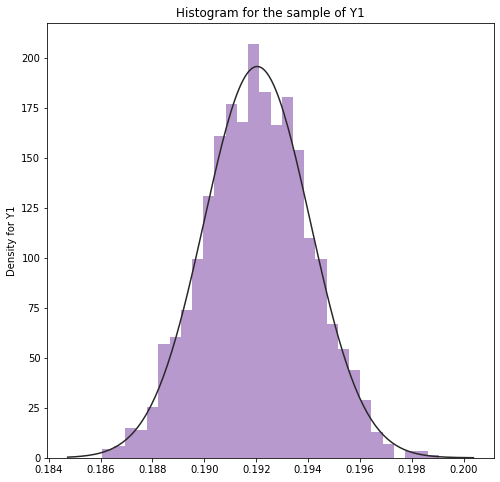

In [ ]:
#-----------------------------------------Figure for Y1
plt.figure(figsize=(8,8))
sns.distplot(Y[:,0],kde=False,fit=norm,color='indigo')
plt.ylabel('Density for Y1')
plt.title('Histogram for the sample of Y1')
plt.show()

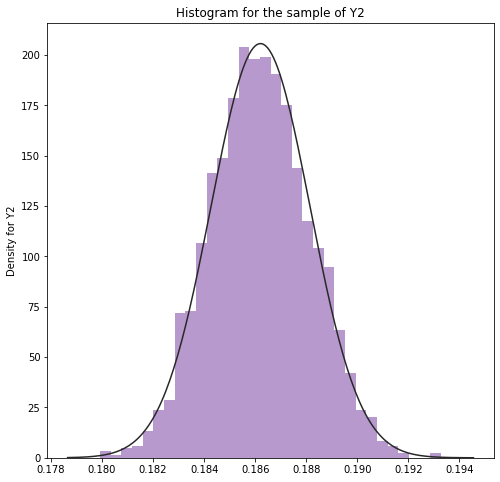

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(Y[:,1],kde=False,fit=norm,color='indigo')
plt.ylabel('Density for Y2')
plt.title('Histogram for the sample of Y2')
plt.show()

As observed from two histograms for $Y_1$ and $Y_2$, the sampled data are fitting the assumption of being normal because both are looking like bell curve.

###  b.The mean and covariance of the 2000 samples

In [ ]:
#---------------------------------Mean for Y1
MEAN_Y1=np.mean(Y1)
print(MEAN_Y1)

0.19203705794594889


In [ ]:
#---------------------------------Mean for Y2
MEAN_Y2=np.mean(Y2)
print(MEAN_Y2)

0.18620840349776965


In [ ]:
#----------------------------------Covariance
COV_Y=np.cov(Y1,Y2)
print(COV_Y)

[[4.15733945e-06 7.85142465e-08]
 [7.85142465e-08 3.76617269e-06]]


### c. Given cost function 
Normally, the formula which is being implemented for cost function is
\begin{align*}
	J(x_o;y_1,y_2)=(x-y)^T(cov(Y))^{-1}(x-y)
\end{align*}
and

\begin{equation*}
	(x-y)= 
	\begin{pmatrix}
		x_1-y_1 \\
		x_2-y_2
	\end{pmatrix}
\end{equation*}

As from the givens \begin{align*}
	X_{i+1}=1.2X_i(1-X_i)
\end{align*}
Express vector (x-y) in terms of $x_o$

\begin{equation*}
	(x-y)= 
	\begin{pmatrix}
		1.2x_o-1.2x_0^2-y_1 \\
		1.44x_o-3.168x_o^2+3.456x_o^3-1.728x_o^4-y_2
	\end{pmatrix}
\end{equation*}


In [ ]:
def Cost_Func(x0,y1,y2,COV_Y):
    XY=np.array((1.2*x0-1.2*x0**2-y1,1.44*x0-3.168*x0**2+3.456*x0**3-1.728*x0**4-y2))
    J=XY@np.linalg.inv(COV_Y)@XY.T
    return J

J=Cost_Func(x0,MEAN_Y1,MEAN_Y2,COV_Y)
print(J)

0.0008564214013379982


### d. Use one of the 2000 samples and hold data y1, y2 fixed. Given these data vary x0 between 0 and 1 and evaluate the cost function J ($x_{0}$; $y_{1}$, $y_{2}$). Plot J as a function of x0 andchoose enough values of x0 so that you get a smooth looking curve.

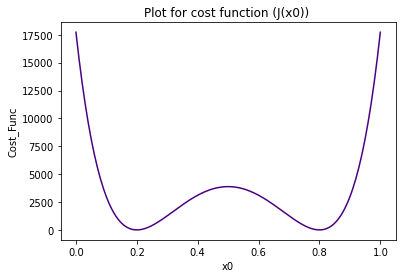

In [ ]:
x1_range=np.linspace(0,1,200)
J=np.zeros(len(x1_range))
for i in range(len(x1_range)):
    J[i]=Cost_Func(x1_range[i],MEAN_Y1,MEAN_Y2,COV_Y)

plt.plot(x1_range,J,markersize=2,color='indigo')
plt.title('Plot for cost function (J(x0)) ')
plt.ylabel('Cost_Func')
plt.xlabel('x0')
plt.show()

### e. Estimate a value for $x_{0}$ the maximizes the probability the data were observed, i.e. findthe MLE estimate. Compare this estimate with the least squares estimate you found inthe Process model exercise.

In [ ]:
x0_min=x1_range[np.argmin(J)]
print('The minumum will be at at x0 =',x0_min)

The minumum will be at at x0 = 0.7989949748743719


By comparing this estimate with the least squares estimate we  found in the process model exercise, this can be noticed that for this case we may have two minimum points, whereas that one in exercise was having only one minimum point.